<a href="https://colab.research.google.com/github/Wewitas/CDS/blob/main/DS_C8_SC1_Formato_Reto_EvelynRendon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Automatic ML - DS_C8_SC1**

---

**Reto: Predicción de candidatos elegibles para promoción laboral**

NOMBRE DEL PARTICIPANTE: Evelyn Aylin Rendon Medina

In [ ]:
# Es importante instalar todas las librerías inicialmente, porque pide reiniciar el entorno de ejecución
!pip install ydata_profiling --upgrade
!pip install sweetviz
!pip install pycaret

     -------------------------------------- 400.1/400.1 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 444.8/444.8 kB 795.9 kB/s eta 0:00:00
     ------------------------------------ 105.4/105.4 kB 609.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 674.5/674.5 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 299.8/299.8 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.3 MB/s eta 0:00:00
     -----------------------------


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 15.1/15.1 MB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1.	Descarga el archivo: EmployeePromotion.csv y guarda, en un dataframe (`info`), todos sus registros.

In [ ]:
import pandas as pd

In [ ]:
# Aquí debes leer el archivo para crear el dataframe info
path = "https://raw.githubusercontent.com/Wewitas/Datasets/refs/heads/main/0.ytdcvnnbhzn0.aoosypzpwlqEmployeePromotion.csv"
df = pd.read_csv(path)

df.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            0  
1                  4            0                  60            0  
2                  7            0                  50            0  
3                 10            0                  50            0  
4                  2            0                  73            0

2. Realiza un análisis exploratorio de datos con la plataforma de AutoEDA ydata Profiling. En la sección de Overview incluye una pestaña `Dataset` con la descripción del conjunto de datos y tu nombre como autor. En una pestaña `Variables` coloca el significado de las columnas.


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
# Genera el reporte con ydata Profiling
ydata_rep = ProfileReport(df, title='AutoEDA ydata Profiling',
                          dataset={'description':'El set de datos contiene variables en torno al rendimiento pasado y actual del empleado, entre otros. La finalidad es determinar debe o no ser promovido.',
                                   'author':'Evelyn Rendon'},
                          variables={'descriptions':{'employee_id':'ID único para el empleado',
                                                         'department':'Departamento de empleado',
                                                         'region':'Región de empleo',
                                                         'education':'Nivel educativo',
                                                         'gender':'Género del empleado',
                                                         'recruitment_channel':'Canal de reclutamiento para el empleado',
                                                         'no_of_trainings':'Número de capacitaciones completadas el año anterior',
                                                         'age':'Edad',
                                                         'previous_year_rating':'Calificación del empleado en el año previo',
                                                         'length_of_service':'Años de servicio',
                                                         'awards_won?':'¿Ganó algún premio el año previo?',
                                                         'avg_training_score':'Promedio de las evaluaciones de formación actuales',
                                                         'is_promoted':'¿Recomendado para promoción?'}})

In [ ]:
# Genera el reporte
ydata_rep.to_file("AutoEDA_ydataProfiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 74.47it/s]
d:\ARCHIVOS\Phyton\lib\site-packages\ydata_profiling\model\correlations.py:87: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'putmask: first argument must be an array')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Muestra el reporte
ydata_rep.to_notebook_iframe()

3. Con la plataforma SweetViz divide el conjunto utilizando la variable `gender` como booleana para comparar las características de los subconjuntos resultantes.

In [ ]:
import sweetviz as sv

In [ ]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [ ]:
# Genera el reporte con SweetViz
sweetviz_rep = sv.compare_intra(df, df['gender']=='m', ['m','f'])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# Genera el reporte
sweetviz_rep.show_html('SweetViz_genderComp.html')

Report SweetViz_genderComp.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



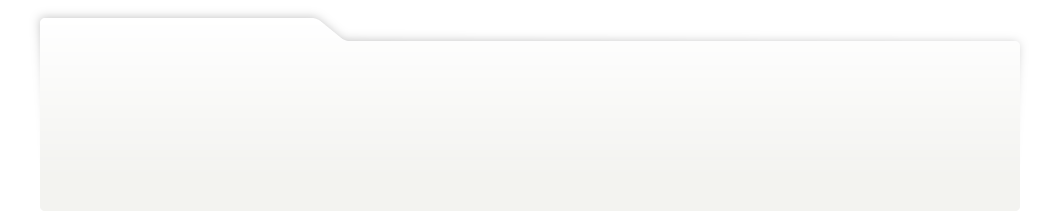
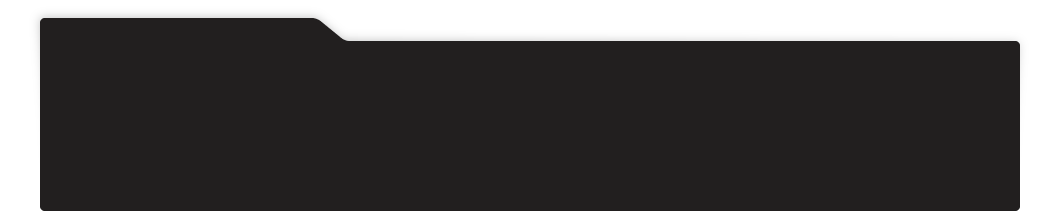
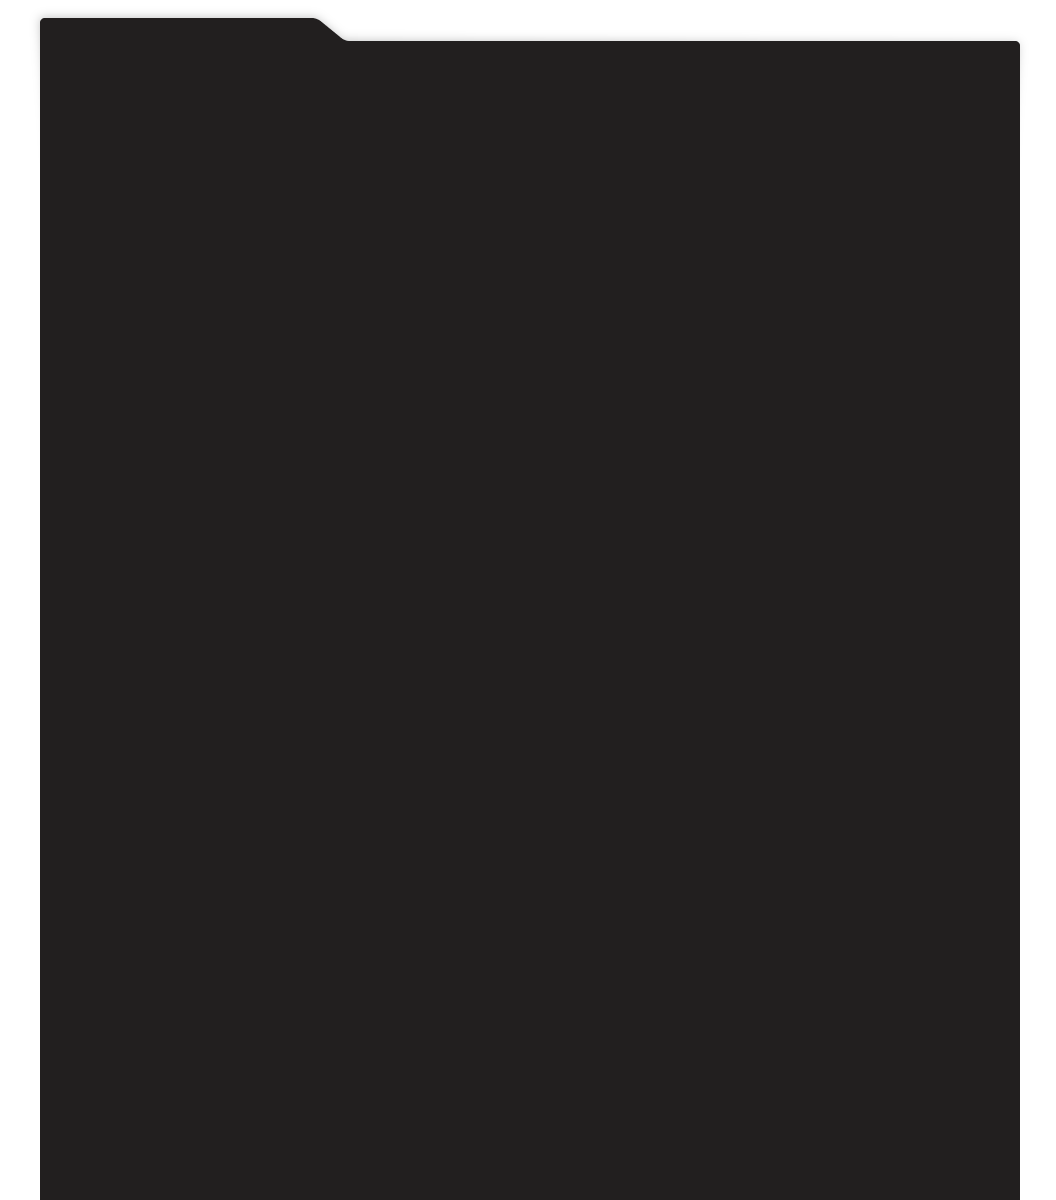
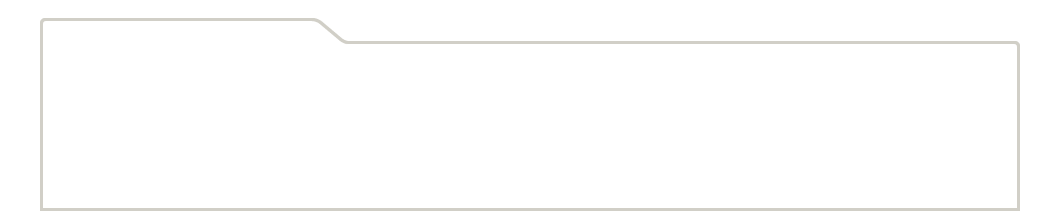
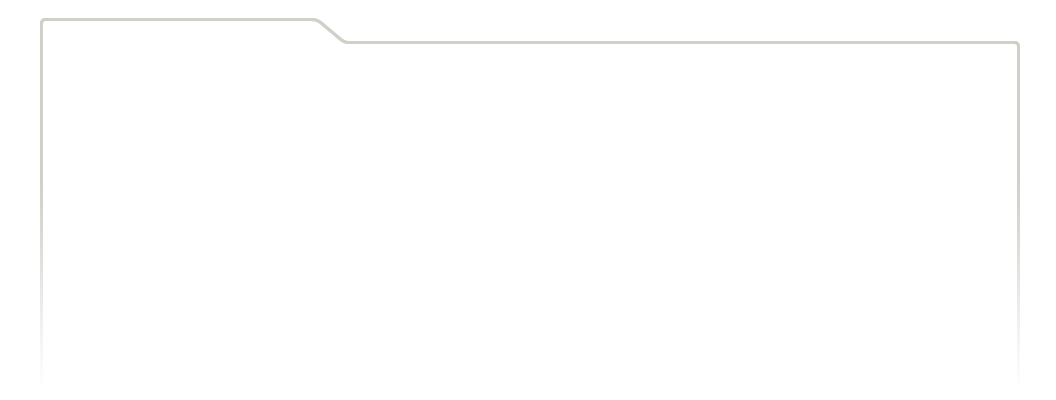
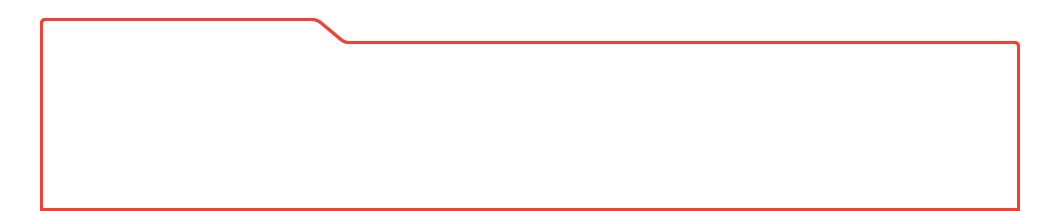
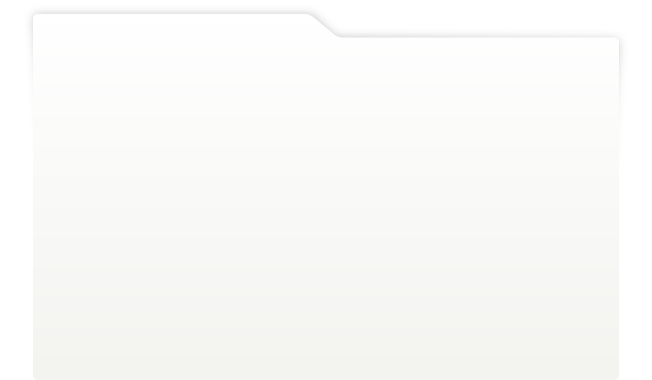
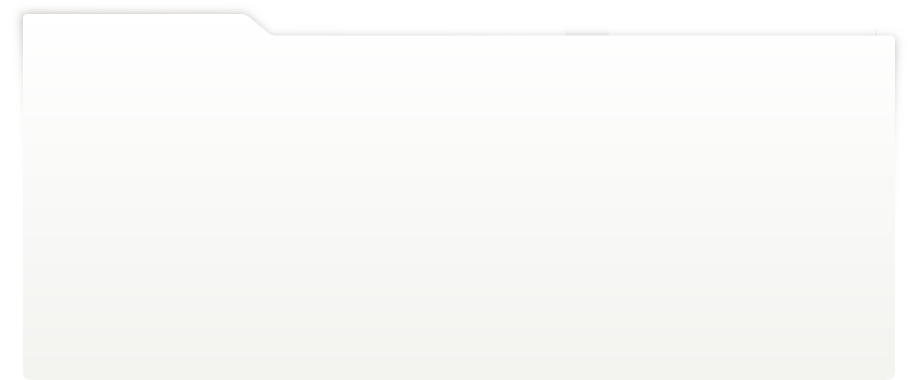
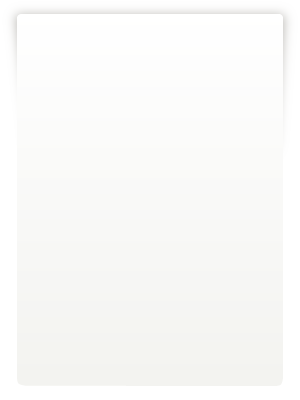
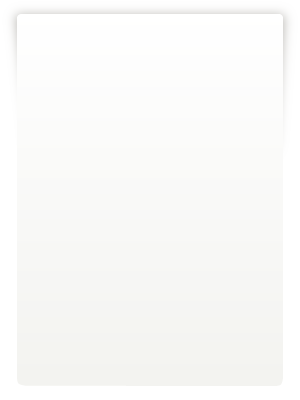
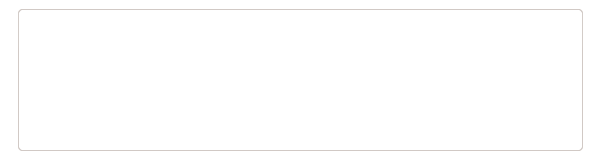
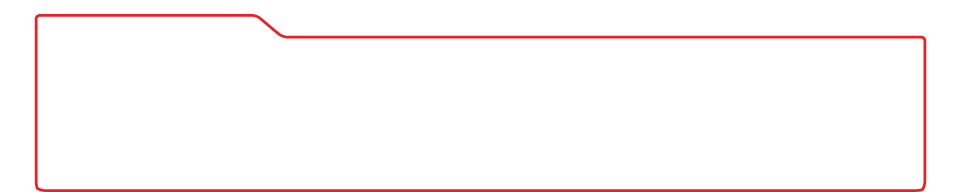
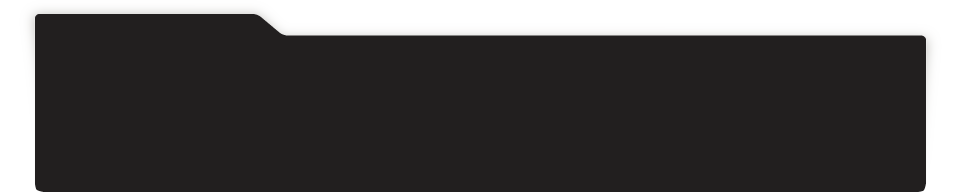
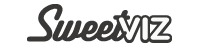
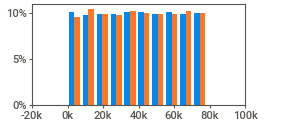
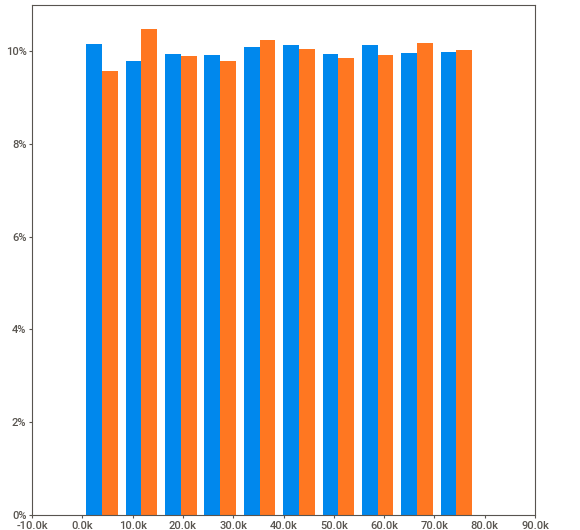
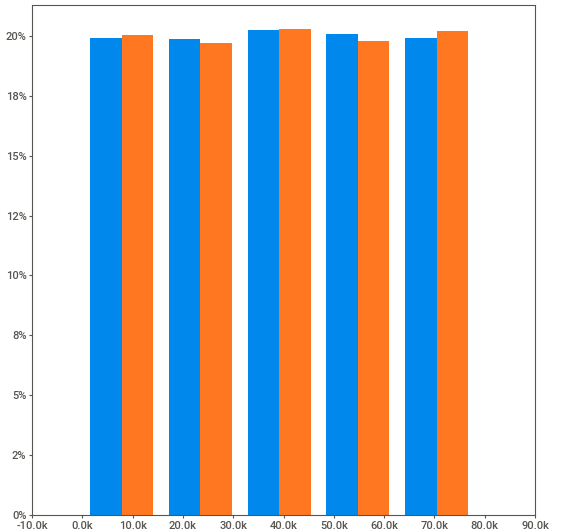
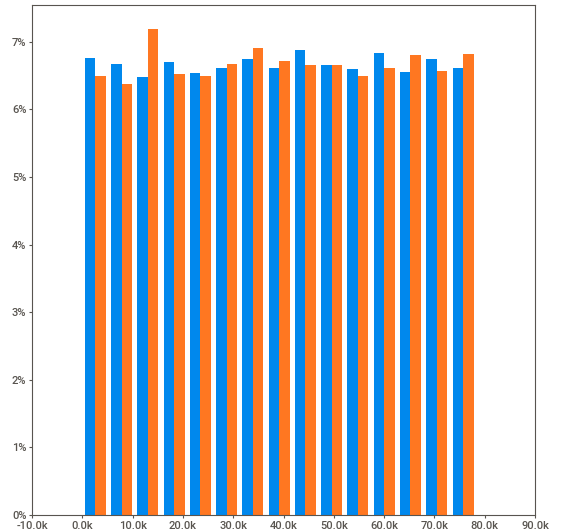
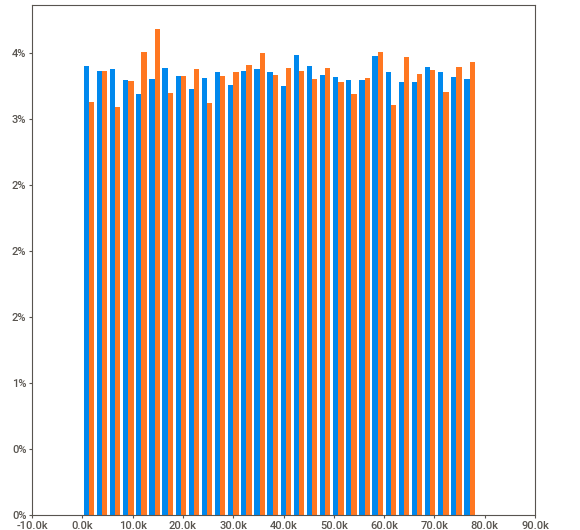
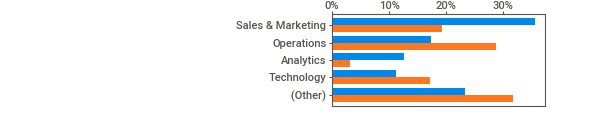
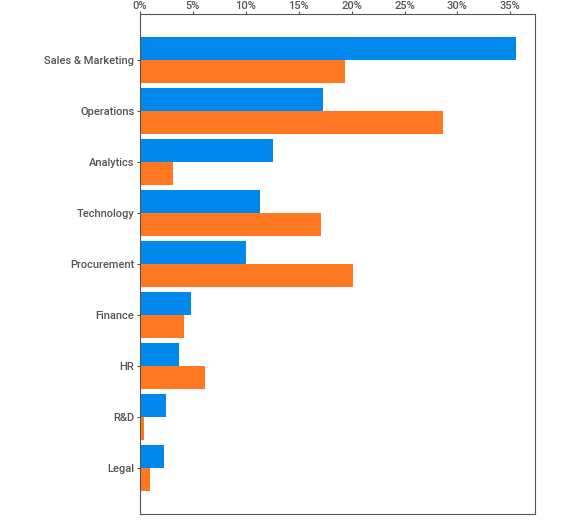
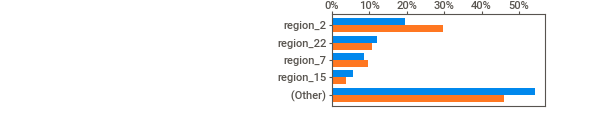
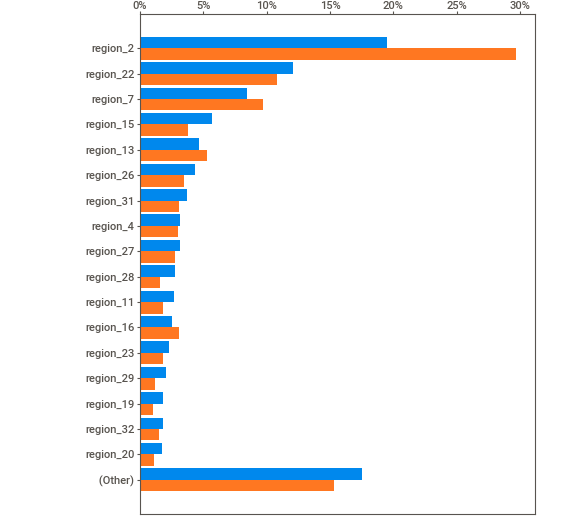
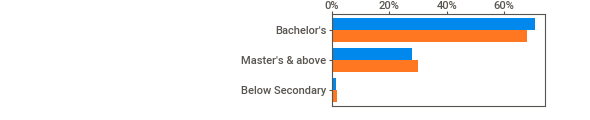
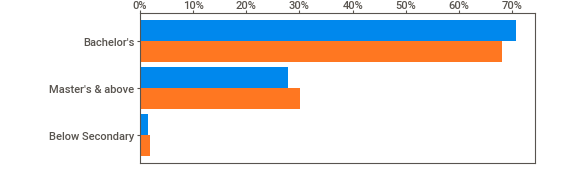
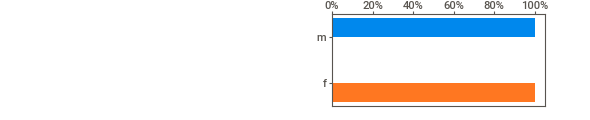
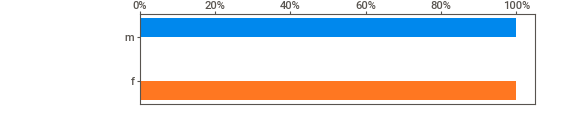
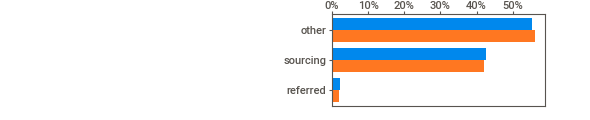
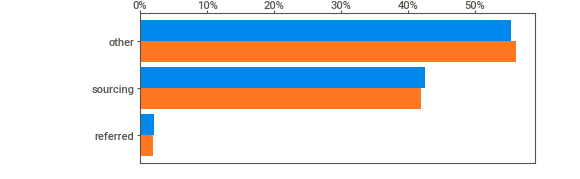
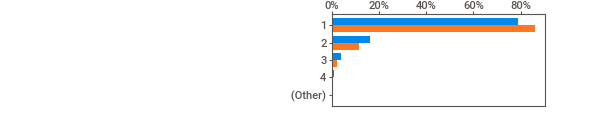
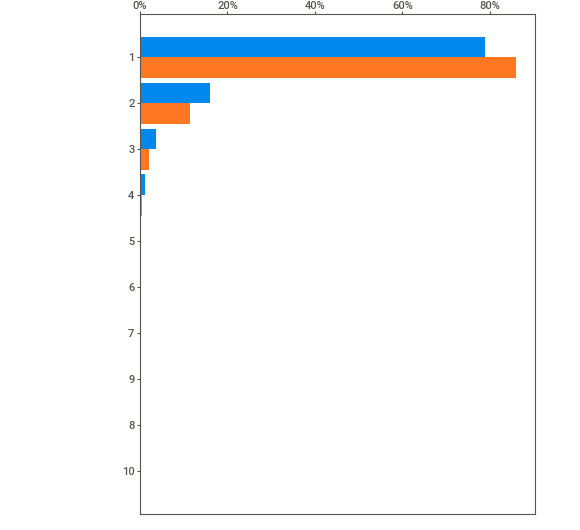
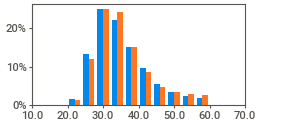
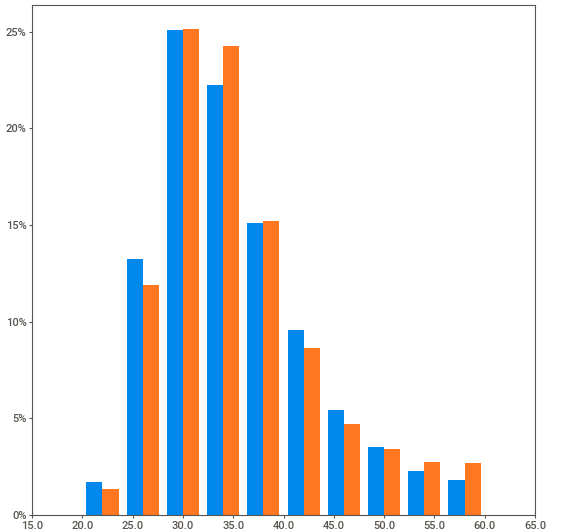
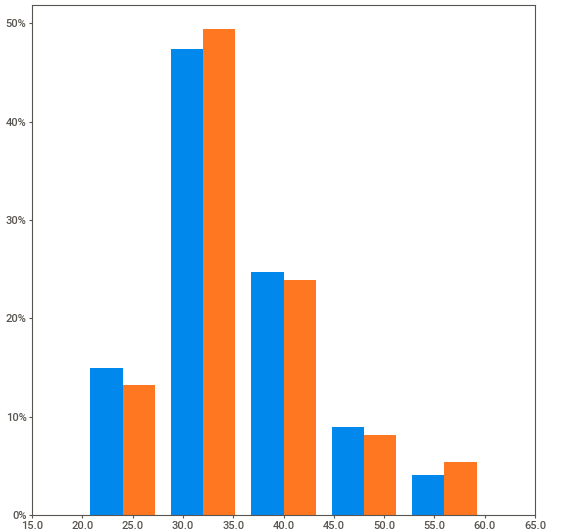
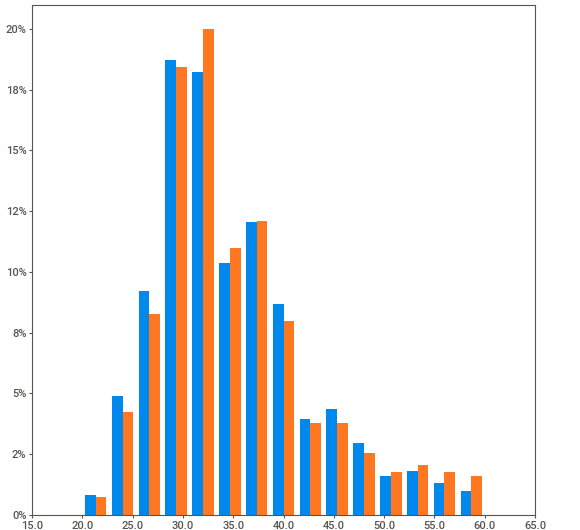
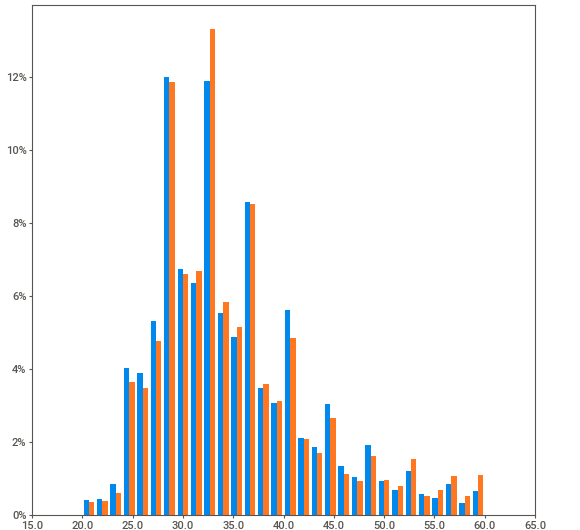
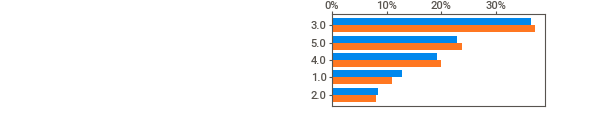
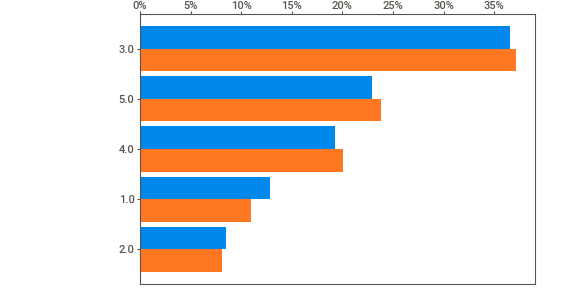
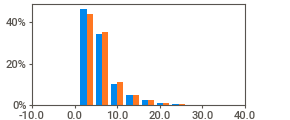
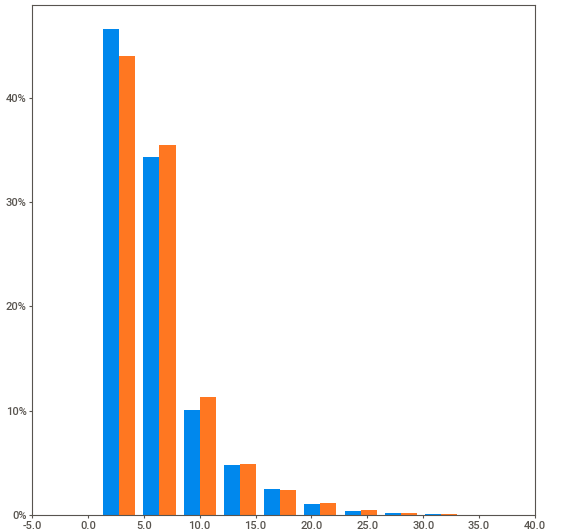
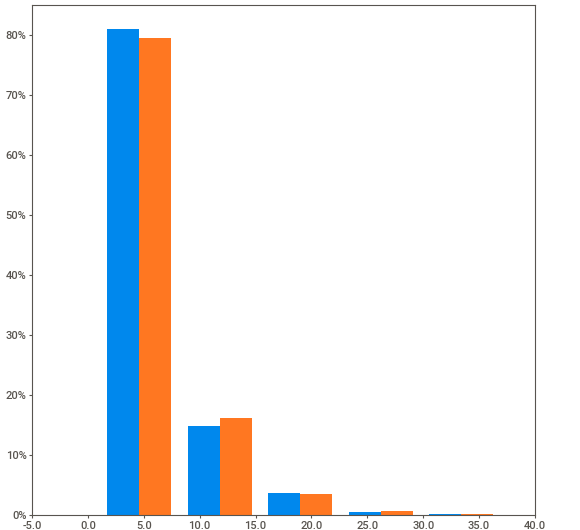
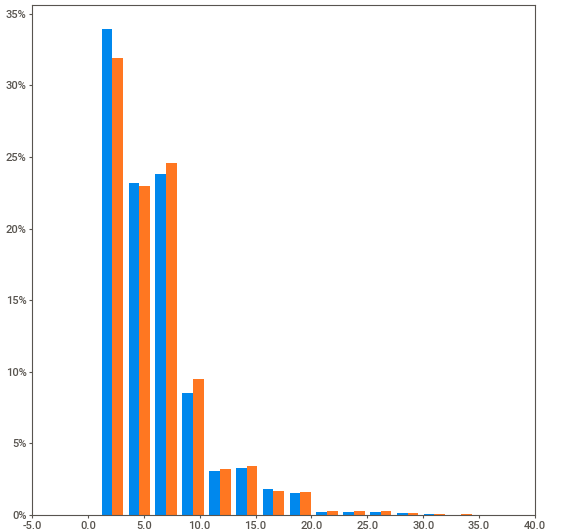
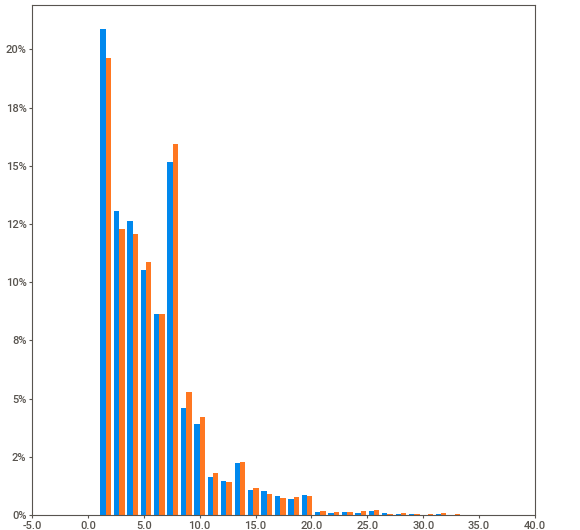
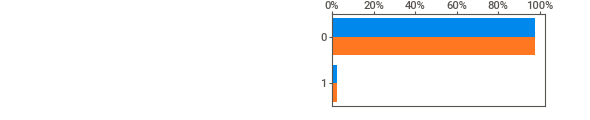
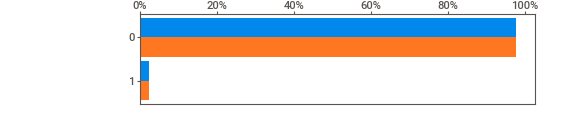
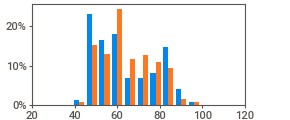
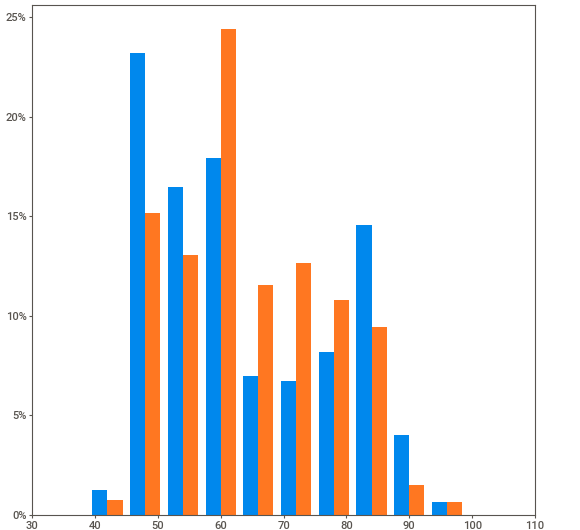
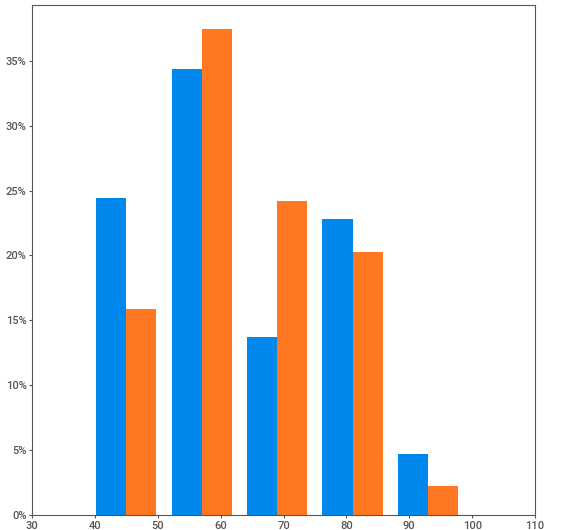
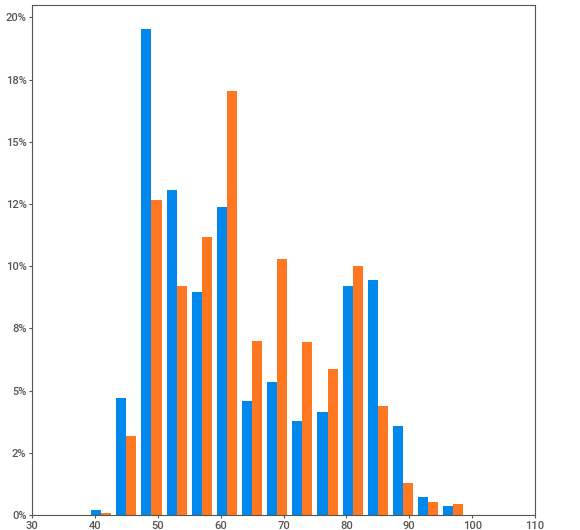
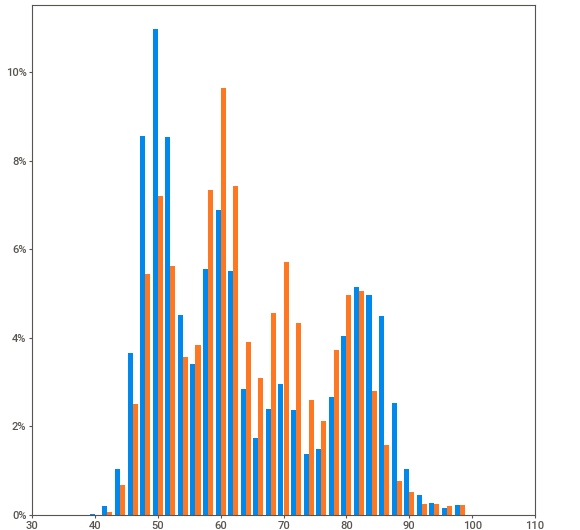
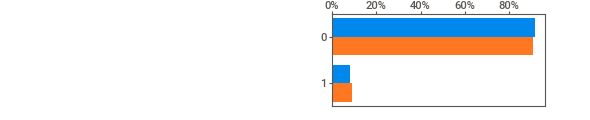
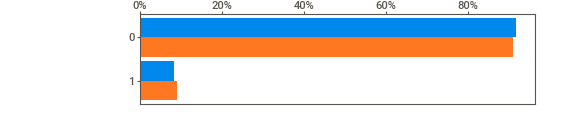
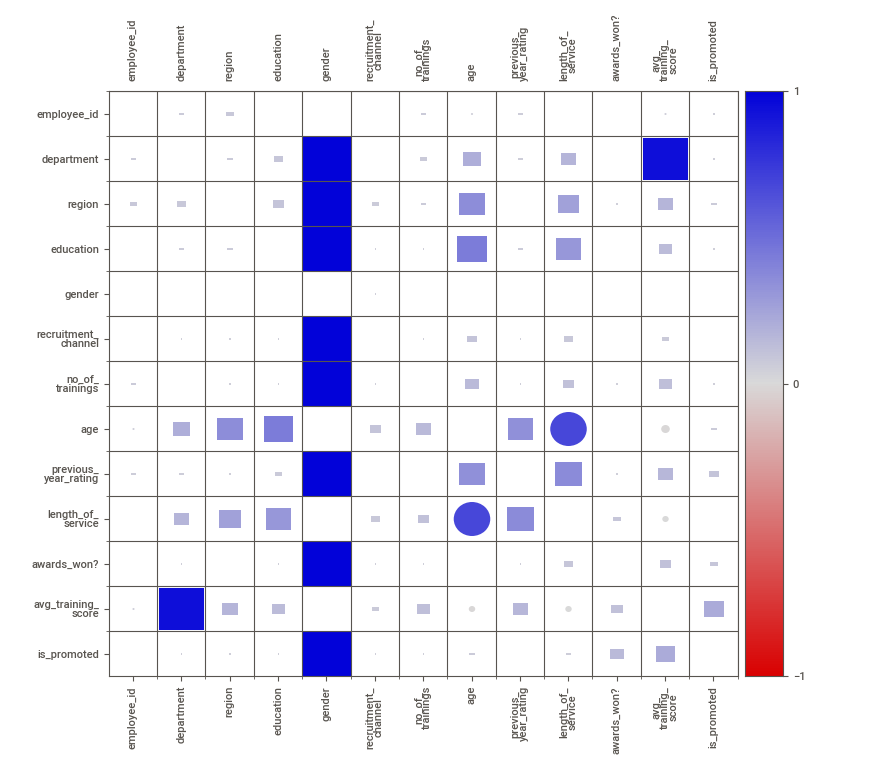
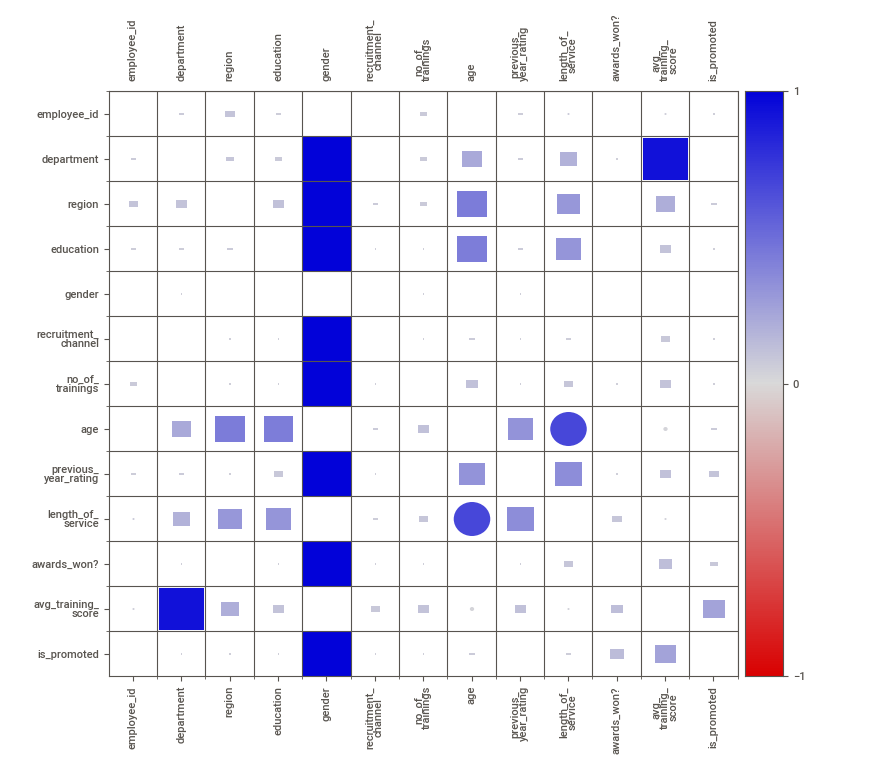

In [ ]:
# Muestra el reporte
sweetviz_rep.show_notebook()

4. Elimina los registros con información faltante (`NaN`) y la columna `employee_id` por no tener aportación en la predicción.

In [ ]:
# Elimina faltantes
empleados = df.copy()

empleados = empleados.dropna()

In [ ]:
# Elimina la columna employee_id
empleados = empleados.drop(columns = ['employee_id'])

5. Codifica las variables categóricas de info con `LabelEncoder`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
empleados.info()

categorical_cols = empleados.select_dtypes(include=["object"]).columns.tolist()
print(categorical_cols)

<class 'pandas.core.frame.DataFrame'>
Index: 48660 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            48660 non-null  object 
 1   region                48660 non-null  object 
 2   education             48660 non-null  object 
 3   gender                48660 non-null  object 
 4   recruitment_channel   48660 non-null  object 
 5   no_of_trainings       48660 non-null  int64  
 6   age                   48660 non-null  int64  
 7   previous_year_rating  48660 non-null  float64
 8   length_of_service     48660 non-null  int64  
 9   awards_won?           48660 non-null  int64  
 10  avg_training_score    48660 non-null  int64  
 11  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.8+ MB
['department', 'region', 'education', 'gender', 'recruitment_channel']


In [ ]:
# Codifica las variables categóricas
empleados = empleados.apply(lambda x: LabelEncoder().fit_transform(x) if (x.name in categorical_cols) else x)
empleados.head()

department  region  education  gender  recruitment_channel  \
0           7      31          2       0                    2   
1           4      14          0       1                    0   
2           7      10          0       1                    2   
3           7      15          0       1                    0   
4           8      18          0       1                    0   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   35                   5.0                  8            0   
1                1   30                   5.0                  4            0   
2                1   34                   3.0                  7            0   
3                2   39                   1.0                 10            0   
4                1   45                   3.0                  2            0   

   avg_training_score  is_promoted  
0                  49            0  
1                  60            0  
2                  50            0  
3                  50            0  
4                  73            0

6. Divide la matriz en conjuntos de entrenamiento y prueba (80:20), utilizando el parámetro `random_state=1` para garantizar reproducibilidad.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divide el conjunto dataframe info para obtener: train y test
train, test = train_test_split(empleados, train_size=0.8, random_state=1)
print('Train:', len(train), '\n Test:', len(test))


Train: 38928 
 Test: 9732


7. Observa la distribución de la variable objetivo `is_promoted`. En caso de que las clases estén desbalanceadas, ejecuta `over_sampling` con el método `SMOTE()`.

In [ ]:
# Observa la distribución
print(train['is_promoted'].unique())
print('is_promoted=1:', (train['is_promoted']==1).sum(), '\n is_promoted=0:', (train['is_promoted']==0).sum())

[0 1]
is_promoted=1: 3376 
 is_promoted=0: 35552


In [ ]:
# Separa los predictores (X) y la variable de salida (y)
X = train.drop(columns=['is_promoted'])
y = train['is_promoted']


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Aplica SMOTE al conjunto de entrenamiento (train[X], train[y])
smote = SMOTE(random_state=1)
X_res, y_res = smote.fit_resample(X, y)

from collections import Counter
print('Resampled dataset shape:', Counter(y_res), '\n Original dataset shape:', Counter(y))

Resampled dataset shape: Counter({0: 35552, 1: 35552}) 
 Original dataset shape: Counter({0: 35552, 1: 3376})


8. Configura el autoaprendizaje de PyCaret asegurándote de usar `preprocess=False` para no aplicar ninguna operación adicional al conjunto.

In [ ]:
from pycaret.classification import *

In [ ]:
train_res = X_res.copy()
train_res['is_promoted'] = y_res


print('is_promoted=1:', (train_res['is_promoted']==1).sum(), '\n is_promoted=0:', (train_res['is_promoted']==0).sum())

is_promoted=1: 35552 
 is_promoted=0: 35552


In [ ]:
# Configura y ejecuta el autoaprendizaje
pyc_ml = setup(data=train_res, target='is_promoted', test_data=test_reset, index=False, preprocess=False, session_id=1)

In [ ]:
# Configura y ejecuta el autoaprendizaje
top_model = compare_models(budget_time=1.5, fold=5)
top_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [ ]:
# Configura y ejecuta el autoaprendizaje
top_model = create_model(top_model)

9. Optimiza el mejor modelo `tune_model()` con la métrica `accuracy`.

In [ ]:
# Optimiza el mejor modelo
tuned_top_model = tune_model(top_model, optimize='Accuracy')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


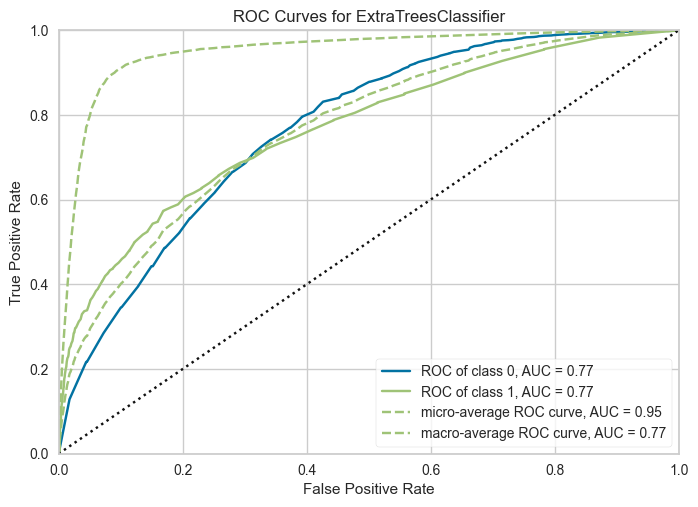

In [ ]:
plot_model(tuned_top_model, plot='auc')

10. Utiliza `evaluate_model()` para mostrar la interfaz de usuario con detalles del modelo optimizado y verifica las métricas `predict_model() `con el conjunto de prueba.

In [ ]:
# Detalles del modelo
evaluate_model(tuned_top_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Verifica las métricas
final_model = finalize_model(tuned_top_model)
predict_model(final_model, data=test)

department  region  education  gender  recruitment_channel  \
0              7      11          2       1                    2   
1              4      11          0       1                    0   
2              8      11          0       1                    2   
3              4      19          0       0                    0   
4              7      20          0       1                    2   
...          ...     ...        ...     ...                  ...   
9727           4      25          0       1                    2   
9728           7      17          0       1                    0   
9729           0      29          0       1                    0   
9730           0       2          0       1                    0   
9731           3      14          0       1                    2   

      no_of_trainings  age  previous_year_rating  length_of_service  \
0                   1   42                   4.0                  5   
1                   1   30                   1.0                  2   
2                   1   27                   5.0                  5   
3                   1   35                   1.0                  3   
4                   1   36                   3.0                  4   
...               ...  ...                   ...                ...   
9727                1   29                   1.0                  2   
9728                2   34                   3.0                  7   
9729                1   31                   4.0                  3   
9730                1   35                   3.0                  8   
9731                1   30                   4.0                  3   

      awards_won?  avg_training_score  is_promoted  prediction_label  \
0               0                  49            0                 0   
1               0                  55            0                 0   
2               0                  80            0                 0   
3               0                  55            0                 0   
4               0                  49            0                 0   
...           ...                 ...          ...               ...   
9727            0                  61            0                 0   
9728            0                  52            0                 0   
9729            0                  85            0                 0   
9730            0                  89            0                 0   
9731            0                  62            0                 0   

      prediction_score  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  
...                ...  
9727               1.0  
9728               1.0  
9729               1.0  
9730               1.0  
9731               1.0  

[9732 rows x 14 columns]

In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…